In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#Fetching and Processing Data

In [3]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

#Splitting training data into training and validation sets
valX = trainX[40000:] 
trainX = trainX[0:40000]

valY = trainY[40000:]
trainY = trainY[0:40000]


print("TrainX Shape: {}".format(trainX.shape))
print("TrainY Shape: {}".format(trainY.shape))

print("ValX Shape: {}".format(valX.shape))
print("ValY Shape: {}".format(valY.shape))

print("TestX Shape: {}".format(testX.shape))
print("TestY Shape: {}".format(testY.shape))

TrainX Shape: (40000, 32, 32, 3)
TrainY Shape: (40000, 1)
ValX Shape: (10000, 32, 32, 3)
ValY Shape: (10000, 1)
TestX Shape: (10000, 32, 32, 3)
TestY Shape: (10000, 1)


In [4]:
#Normalising Data
trainX = trainX / 255.0
valX = valX / 255.0
testX = testX / 255.0

In [5]:
trainYReshaped = trainY.reshape((40000,))
valYReshaped = valY.reshape((10000,))
testYReshaped = testY.reshape((10000,))



trainYOneHot = tf.keras.utils.to_categorical(trainYReshaped)
valYOneHot = tf.keras.utils.to_categorical(valYReshaped)
testYOneHot = tf.keras.utils.to_categorical(testYReshaped)

In [6]:
classNames = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

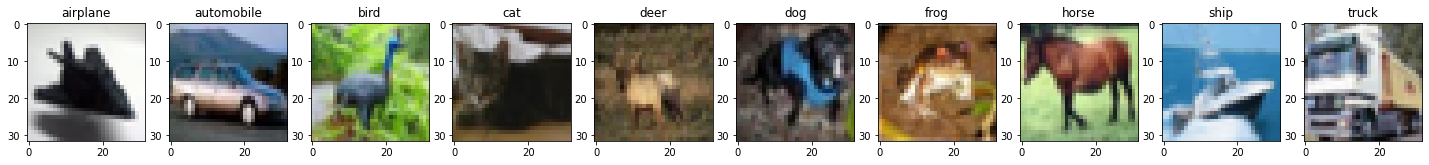

In [7]:
plt.figure(len(classNames), (25, 25))

for i in range(len(classNames)):
  plt.subplot(1, len(classNames), i + 1)
  plt.title(classNames[i])
  plt.imshow(trainX[trainYReshaped == i][0])

#Building and Training Model

In [8]:
model = tf.keras.models.Sequential(name = 'MyImageClassificationModel')

model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "MyImageClassificationModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          36928     
                                        

In [9]:
model.fit(trainX, trainYOneHot, batch_size = 32, epochs = 10, validation_data = (valX, valYOneHot))

Epoch 1/10
1250/1250 [==============================] - 14s 7ms/step - loss: 1.5807 - accuracy: 0.4166 - val_loss: 1.2875 - val_accuracy: 0.5362
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1752 - accuracy: 0.5800 - val_loss: 1.0521 - val_accuracy: 0.6259
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9928 - accuracy: 0.6470 - val_loss: 1.0042 - val_accuracy: 0.6401
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8645 - accuracy: 0.6928 - val_loss: 0.9178 - val_accuracy: 0.6792
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7700 - accuracy: 0.7284 - val_loss: 0.8393 - val_accuracy: 0.7050
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6885 - accuracy: 0.7570 - val_loss: 0.8735 - val_accuracy: 0.7040
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6184 - accuracy: 0.7807 - val_loss: 0.8165 - val_accuracy

#Evaluating Model

In [10]:
model.evaluate(testX, testYOneHot)

313/313 [==============================] - 1s 4ms/step - loss: 0.9641 - accuracy: 0.7074


[0.964111328125, 0.7074000239372253]